<a href="https://colab.research.google.com/github/reesha-rsh/MLb4/blob/main/Homework/Homework_6_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

train_full = pd.read_csv("/content/drive/MyDrive/MLb4/EDA Titanic/train.csv")
test_full = pd.read_csv("/content/drive/MyDrive/MLb4/EDA Titanic/test.csv")

Mounted at /content/drive


In [2]:
train_full

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


2. Make a basic EDA, write briefly a few conclusions that, in your opinion, will affect the model / model validation / metrics

I am removing text features that I think will not be usefull for the models. Also One-Hot Encoding for Sex. Most probably the Sex affects the result the most.

In [10]:
def generate(df,age_median,fare_median):
  useless_features = ['Name','Ticket','Cabin']
  data_cleaned = df
  data_cleaned = data_cleaned.drop(columns = useless_features)

  # generate binary values using get_dummies
  data_cleaned = pd.get_dummies(data_cleaned, columns=['Sex'],prefix=["Sex"])
  data_cleaned = pd.get_dummies(data_cleaned, columns=['Embarked'],prefix=["Embarked"])

  # Check for NaN values in the DataFrame
  nan_mask = data_cleaned.isnull()
  # Count the number of NaN values in each column
  nan_count_per_column = data_cleaned.isnull().sum()

  data_cleaned['Age'] = data_cleaned['Age'].fillna(age_median)
  data_cleaned['Fare'] = data_cleaned['Fare'].fillna(fare_median)

  return data_cleaned


In [13]:
features_columns = ['Pclass',	'Age',	'SibSp',	'Parch',	'Fare',	'Sex_female',	'Sex_male',	'Embarked_C',	'Embarked_Q',	'Embarked_S']

In [14]:
# get medians that will fill NaNs in generate func
age_median = train_full['Age'].median()
fare_median = train_full['Fare'].median()

In [15]:
train = generate(train_full,age_median=age_median,fare_median=fare_median)
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,888,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,889,0,3,28.0,1,2,23.4500,1,0,0,0,1
889,890,1,1,26.0,0,0,30.0000,0,1,1,0,0


3. Describe your validation approach and metrics for this dataset.

*   Validation approach: We have a small amount of data so I will use a **K Fold** method
*   Metric: I plan to optimize **fbeta score** with beta 0.1 to give more weight for precision, thus minimizing false positives - reducing the prediction that a passenger survived when he actually did not.



4. Train and tune logistic regression (optimise the metric).

In [16]:
# titanic_features = train.drop('Survived', axis=1).drop('PassengerId',axis=1)
# titanic_label = train['Survived']

In [30]:
titanic_features = train[features_columns]
titanic_label = train['Survived']

In [18]:
random_state = 42

In [ ]:
# Initialize the StratifiedKFold object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

In [32]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, fbeta_score
from sklearn import metrics

# Define the logistic regression model
classifier = LogisticRegression()

params = dict(C=[100, 10, 1, 0.1, 0.01, 0.001, 0.0001])



# Define the custom scoring function with the desired beta value
beta = 0.1
custom_scorer = make_scorer(fbeta_score, beta=beta)

# Initialize the GridSearchCV object with the custom scoring function
grid_search = GridSearchCV(classifier, param_grid=params, scoring=custom_scorer, cv=skf)

# Perform grid search with K-fold cross-validation to find the best hyperparameters
grid_search.fit(titanic_features, titanic_label)

# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Train the model with the best hyperparameters on the full data
best_model.fit(titanic_features, titanic_label)

# Make predictions on the test set
y_pred = best_model.predict(titanic_features)

# Calculate the F-beta score with the specified beta value
fbeta = fbeta_score(titanic_label, y_pred, beta=beta)

print("Best Hyperparameters:", best_params)
print("F-beta Score (beta={}): {:.4f}".format(beta, fbeta))
print(metrics.classification_report(titanic_label, y_pred))
print(metrics.confusion_matrix(titanic_label, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Hyperparameters: {'C': 0.01}
F-beta Score (beta=0.1): 0.8471
              precision    recall  f1-score   support

           0       0.76      0.94      0.84       549
           1       0.85      0.52      0.65       342

    accuracy                           0.78       891
   macro avg       0.81      0.73      0.75       891
weighted avg       0.80      0.78      0.77       891

[[518  31]
 [163 179]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [37]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, fbeta_score, classification_report,accuracy_score


# Define the logistic regression model
classifier = LogisticRegression()

# Define the hyperparameter grid for C (you can add other hyperparameters if needed)
params = dict(C=[100, 10, 1, 0.1, 0.01, 0.001, 0.0001])

# Initialize the StratifiedKFold object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

# Define the range of beta values to test
beta_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Initialize an empty dictionary to store the results
beta_results = {}

# Loop over the beta values
for beta in beta_values:
    # Create a custom scorer with the current beta value to optimize F-beta score
    custom_scorer = make_scorer(fbeta_score, beta=beta)

    # Initialize the GridSearchCV object with the custom scoring function
    grid_search = GridSearchCV(classifier, param_grid=params, scoring=custom_scorer, cv=skf, error_score='raise')

    # Perform grid search with K-fold cross-validation to find the best hyperparameters
    grid_search.fit(titanic_features, titanic_label)

    # Get the best hyperparameters and the corresponding model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Train the model with the best hyperparameters on the full data
    best_model.fit(titanic_features, titanic_label)

    # Make predictions on the test set
    y_pred = best_model.predict(titanic_features)

    # Calculate the F-beta score with the specified beta value
    fbeta = fbeta_score(titanic_label, y_pred, beta=beta)

    accuracy = accuracy_score(titanic_label, y_pred)

    # Store the results in the dictionary
    beta_results[beta] = {'best_params': best_params, 'best_model': best_model, 'fbeta_score': fbeta, 'accuracy': accuracy}

# Display the results for each beta value
for beta in beta_values:
    print("For beta = {}".format(beta))
    print("Best Hyperparameters:", beta_results[beta]['best_params'])
    print("F-beta Score (beta={}): {:.4f}".format(beta, beta_results[beta]['fbeta_score']))
    print("Accuracy: {:.4f}".format(beta_results[beta]['accuracy']))
    print("Classification Report (beta={}):\n".format(beta))
    print(classification_report(titanic_label, beta_results[beta]['best_model'].predict(titanic_features)))
    print("="*80)  # Separate the results for different beta values


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

For beta = 0.1
Best Hyperparameters: {'C': 0.01}
F-beta Score (beta=0.1): 0.8471
Accuracy: 0.8013
Classification Report (beta=0.1):

              precision    recall  f1-score   support

           0       0.76      0.94      0.84       549
           1       0.85      0.52      0.65       342

    accuracy                           0.78       891
   macro avg       0.81      0.73      0.75       891
weighted avg       0.80      0.78      0.77       891

For beta = 0.2
Best Hyperparameters: {'C': 0.01}
F-beta Score (beta=0.2): 0.8323
Accuracy: 0.8013
Classification Report (beta=0.2):

              precision    recall  f1-score   support

           0       0.76      0.94      0.84       549
           1       0.85      0.52      0.65       342

    accuracy                           0.78       891
   macro avg       0.81      0.73      0.75       891
weighted avg       0.80      0.78      0.77       891

For beta = 0.3
Best Hyperparameters: {'C': 0.01}
F-beta Score (beta=0.3): 0.8103

For beta = 0.1
Best Hyperparameters: {'C': 0.01}
F-beta Score (beta=0.1): 0.8471
Accuracy: 0.8013
Classification Report (beta=0.1):

              precision    recall  f1-score   support

           0       0.76      0.94      0.84       549
           1       0.85      0.52      0.65       342

    accuracy                           0.78       891
   macro avg       0.81      0.73      0.75       891
weighted avg       0.80      0.78      0.77       891

================================================================================
For beta = 0.2
Best Hyperparameters: {'C': 0.01}
F-beta Score (beta=0.2): 0.8323
Accuracy: 0.8013
Classification Report (beta=0.2):

              precision    recall  f1-score   support

           0       0.76      0.94      0.84       549
           1       0.85      0.52      0.65       342

    accuracy                           0.78       891
   macro avg       0.81      0.73      0.75       891
weighted avg       0.80      0.78      0.77       891

================================================================================
For beta = 0.3
Best Hyperparameters: {'C': 0.01}
F-beta Score (beta=0.3): 0.8103
Accuracy: 0.8013
Classification Report (beta=0.3):

              precision    recall  f1-score   support

           0       0.76      0.94      0.84       549
           1       0.85      0.52      0.65       342

    accuracy                           0.78       891
   macro avg       0.81      0.73      0.75       891
weighted avg       0.80      0.78      0.77       891

================================================================================
For beta = 0.4
Best Hyperparameters: {'C': 0.1}
F-beta Score (beta=0.4): 0.7549
Accuracy: 0.8013
Classification Report (beta=0.4):

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       549
           1       0.77      0.70      0.73       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.79       891
weighted avg       0.80      0.80      0.80       891

================================================================================
For beta = 0.5
Best Hyperparameters: {'C': 0.1}
F-beta Score (beta=0.5): 0.7503
Accuracy: 0.8013
Classification Report (beta=0.5):

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       549
           1       0.77      0.70      0.73       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.79       891
weighted avg       0.80      0.80      0.80       891

================================================================================
For beta = 0.6
Best Hyperparameters: {'C': 0.1}
F-beta Score (beta=0.6): 0.7456
Accuracy: 0.8013
Classification Report (beta=0.6):

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       549
           1       0.77      0.70      0.73       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.79       891
weighted avg       0.80      0.80      0.80       891

================================================================================
For beta = 0.7
Best Hyperparameters: {'C': 0.1}
F-beta Score (beta=0.7): 0.7410
Accuracy: 0.8013
Classification Report (beta=0.7):

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       549
           1       0.77      0.70      0.73       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.79       891
weighted avg       0.80      0.80      0.80       891

================================================================================
For beta = 0.8
Best Hyperparameters: {'C': 0.1}
F-beta Score (beta=0.8): 0.7366
Accuracy: 0.8013
Classification Report (beta=0.8):

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       549
           1       0.77      0.70      0.73       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.79       891
weighted avg       0.80      0.80      0.80       891

================================================================================
For beta = 0.9
Best Hyperparameters: {'C': 0.1}
F-beta Score (beta=0.9): 0.7326
Accuracy: 0.8013
Classification Report (beta=0.9):

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       549
           1       0.77      0.70      0.73       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.79       891
weighted avg       0.80      0.80      0.80       891

================================================================================
For beta = 1
Best Hyperparameters: {'C': 0.1}
F-beta Score (beta=1): 0.7289
Accuracy: 0.8013
Classification Report (beta=1):

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       549
           1       0.77      0.70      0.73       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.79       891
weighted avg       0.80      0.80      0.80       891

================================================================================


5. Do the same with a decision tree.

In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, fbeta_score



# Define the DecisionTreeClassifier model
classifier = DecisionTreeClassifier(random_state=random_state)

# Define the hyperparameter grid to search over
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'max_features': [None, 1, 2, 3, 4, 5, 6],
    'class_weight': [None, 'balanced']
}


# Define the beta value for F-beta score (e.g., beta = 0.1 to prioritize precision)
beta = 0.1

# Create a custom scorer with the specified beta value to optimize precision in F-beta score
custom_scorer = make_scorer(fbeta_score, beta=beta)

# Initialize the GridSearchCV object with the DecisionTreeClassifier, hyperparameter grid, and custom scorer
grid_search = GridSearchCV(classifier, param_grid, scoring=custom_scorer, cv=skf)

# Perform grid search to find the best hyperparameters
grid_search.fit(titanic_features, titanic_label)

# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Optionally, you can evaluate the model on the full data using the F-beta score with beta=0.1
y_pred = best_model.predict(titanic_features)
fbeta = fbeta_score(titanic_label, y_pred, beta=beta)
print("F-beta Score (beta={}): {:.4f}".format(beta, fbeta))

print(metrics.classification_report(titanic_label, y_pred))
print(metrics.confusion_matrix(titanic_label, y_pred))


Best Hyperparameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 10, 'splitter': 'random'}
F-beta Score (beta=0.1): 0.9377
              precision    recall  f1-score   support

           0       0.75      0.98      0.85       549
           1       0.95      0.47      0.63       342

    accuracy                           0.79       891
   macro avg       0.85      0.73      0.74       891
weighted avg       0.82      0.79      0.77       891

[[540   9]
 [181 161]]


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
3080 fits failed out of a total of 33880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3080 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, fbeta_score, classification_report

# Define the DecisionTreeClassifier model
classifier = DecisionTreeClassifier(random_state=random_state)

# Define the hyperparameter grid to search over
param_grid = {
    'criterion': ['gini'],
    'splitter': ['random'],
    'max_depth': [None, 3, 5, 7, 9, 11],
    'min_samples_leaf': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    'class_weight': ['balanced']
}

# Define the range of beta values to test
beta_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Initialize an empty dictionary to store the results
beta_results = {}

# Loop over the beta values
for beta in beta_values:
    # Create a custom scorer with the current beta value to optimize F-beta score
    custom_scorer = make_scorer(fbeta_score, beta=beta)

    # Initialize the GridSearchCV object with the custom scoring function and already declared StratifiedKFold object
    grid_search = GridSearchCV(classifier, param_grid, scoring=custom_scorer, cv=skf)

    # Perform grid search with K-fold cross-validation to find the best hyperparameters
    grid_search.fit(titanic_features, titanic_label)

    # Get the best hyperparameters and the corresponding model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Train the model with the best hyperparameters on the full data
    best_model.fit(titanic_features, titanic_label)

    # Make predictions on the test set
    y_pred = best_model.predict(titanic_features)

    # Calculate the F-beta score with the specified beta value
    fbeta = fbeta_score(titanic_label, y_pred, beta=beta)

    accuracy = accuracy_score(titanic_label, y_pred)

    # Store the results in the dictionary
    beta_results[beta] = {'best_params': best_params, 'best_model': best_model, 'fbeta_score': fbeta,'accuracy': accuracy}

# Display the results for each beta value
for beta in beta_values:
    print("For beta = {}".format(beta))
    print("Best Hyperparameters:", beta_results[beta]['best_params'])
    print("F-beta Score (beta={}): {:.4f}".format(beta, beta_results[beta]['fbeta_score']))
    print("Accuracy: {:.4f}".format(beta_results[beta]['accuracy']))
    print("Classification Report (beta={}):\n".format(beta))
    print(classification_report(titanic_label, beta_results[beta]['best_model'].predict(titanic_features)))
    print("="*80)  # Separate the results for different beta values

For beta = 0.1
Best Hyperparameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 0.2, 'min_samples_leaf': 0.1, 'splitter': 'random'}
F-beta Score (beta=0.1): 0.7414
Accuracy: 0.7868
Classification Report (beta=0.1):

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       549
           1       0.74      0.68      0.71       342

    accuracy                           0.79       891
   macro avg       0.78      0.77      0.77       891
weighted avg       0.78      0.79      0.78       891

For beta = 0.2
Best Hyperparameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 0.2, 'min_samples_leaf': 0.1, 'splitter': 'random'}
F-beta Score (beta=0.2): 0.7395
Accuracy: 0.7868
Classification Report (beta=0.2):

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       549
           1       0.74      0.68      0.71     



6. Visualize the decision tree and interpret the model (describe the most important features, whether the splits are logical, etc.)

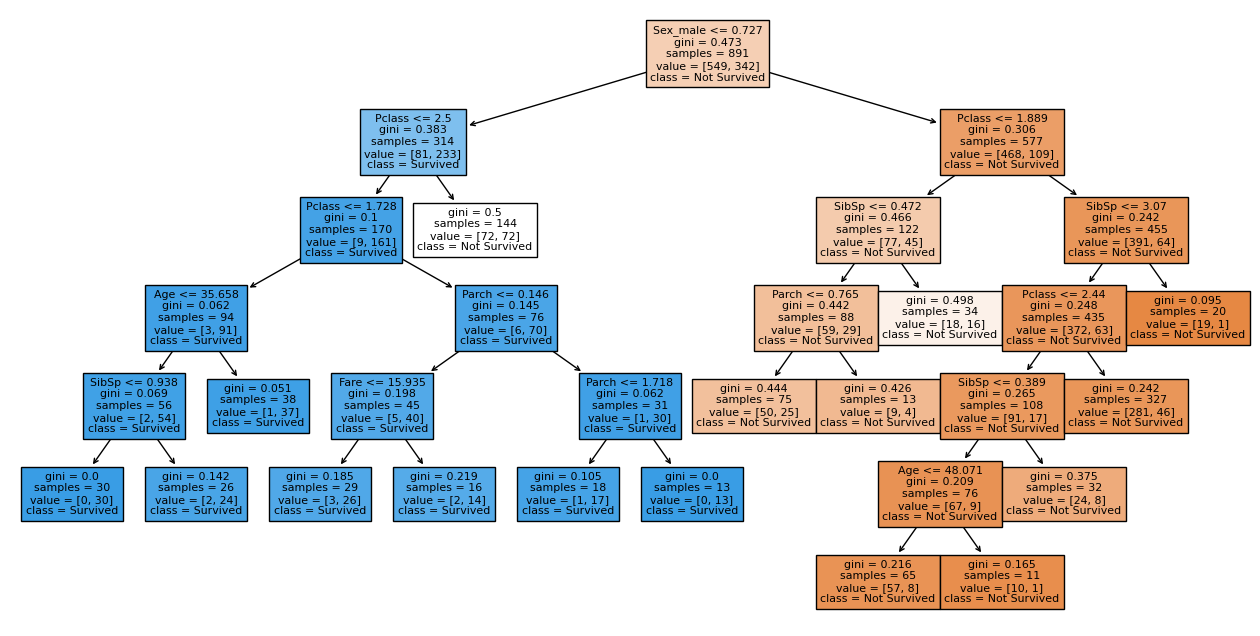

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# Visualize the decision tree splits
plt.figure(figsize=(16, 8))
plot_tree(best_model, filled=True, feature_names=titanic_features.columns, class_names=['Not Survived', 'Survived'])
plt.show()

Looks like the most imporant features are Sex and Pclass. While testing there were other features but these are top 2 always.

I expected the Age to be more important.

The splits look logical: First we check for Sex. Women has more chance to survive than men





7. If there is a test dataset, then make predictions on it and compare the result on lb with what you've got on validation (if there is no test dataset, then create it yourself, before training the model, separate 15-20% from the dataset and it will be your test). on the test, you run the model only once to find out the final result.

In [ ]:
test = generate(test_full,age_median=age_median,fare_median=fare_median)
test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,892,3,34.5,0,0,7.8292,0,1
1,893,3,47.0,1,0,7.0000,1,0
2,894,2,62.0,0,0,9.6875,0,1
3,895,3,27.0,0,0,8.6625,0,1
4,896,3,22.0,1,1,12.2875,1,0
...,...,...,...,...,...,...,...,...
413,1305,3,27.0,0,0,8.0500,0,1
414,1306,1,39.0,0,0,108.9000,1,0
415,1307,3,38.5,0,0,7.2500,0,1
416,1308,3,27.0,0,0,8.0500,0,1


In [ ]:
X_test = test[features_columns]
y_pred = best_model.predict(X_test)

In [ ]:
submission_data = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': y_pred})

print(submission_data)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [ ]:
submission_data.to_csv("/content/drive/MyDrive/MLb4/EDA Titanic/submission.csv", index=False)

Kaggle result: Accuracy 0.77511